## Challenge: Climate change in Zurich?

In [1]:
import pandas as pd
import numpy as np
import scipy
import json
#from matplotlib import cm
from pandas.io.json import json_normalize #package for flattening json in pandas df

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sets standard seaborn theme as default

### Explore weather data from Zurich-Fluntern

In [2]:
data = pd.read_csv('/Users/iMotz/Propulsion/PYTHON/Visualization/data/homog_mo_SMA_edit.txt', sep = ',')
data = data.drop(columns = 'Unnamed: 4')
data.head()


,Year,Month,Temperature,Precipitation
0,1864,1,-6.6,25.7
1,1864,2,-1.5,32.9
2,1864,3,4.5,51.0
3,1864,4,6.8,46.9
4,1864,5,12.3,78.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 4 columns):
Year             1848 non-null int64
Month            1848 non-null int64
Temperature      1848 non-null float64
Precipitation    1848 non-null float64
dtypes: float64(2), int64(2)
memory usage: 57.8 KB


In [97]:
# averages, min, max per year
min_year = data.groupby('Year').min().reset_index()
max_year = data.groupby('Year').max().reset_index()
mean_year = data.groupby('Year').mean().reset_index()
sum_year = data.groupby('Year').sum().reset_index()   
# per month
mean_month = data.groupby('Month').mean().reset_index()
mean_month_10 = data[data['Year']>2007].groupby('Month').mean().reset_index() # in the last 10 years


,Month,Year,Temperature,Precipitation
0,1,2012.5,0.79,71.00
1,2,2012.5,1.43,47.41
2,3,2012.5,5.77,58.02
3,4,2012.5,9.92,90.38
4,5,2012.5,13.67,119.96
5,6,2012.5,17.33,137.52
6,7,2012.5,19.05,147.68
7,8,2012.5,18.75,104.51
8,9,2012.5,14.45,83.21
9,10,2012.5,10.02,79.42


### Temperatures

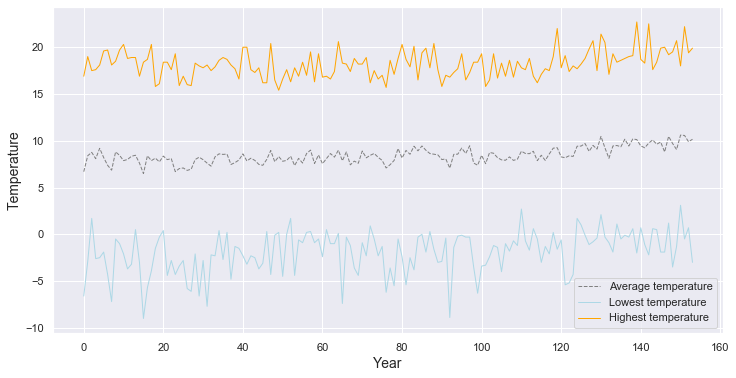

In [103]:
plt.rcParams['figure.figsize'] = (12, 6)

fig, ax = plt.subplots()
ax.plot(mean_year['Temperature'], c = 'grey', lw = 1, label = 'Average temperature', linestyle = '--')
ax.plot(min_year['Temperature'], c = 'lightblue', lw = 1, label = 'Lowest temperature')
ax.plot(max_year['Temperature'], c = 'orange', lw = 1, label = 'Highest temperature')

# ax.axhspan(min_year['Temperature'], max_year['Temperature'], facecolor='0.5', alpha=0.3)

ax.set_xlabel('Year', size = 14)
ax.set_ylabel('Temperature', size = 14)
ax.legend(loc= 'lower right')
None
plt.savefig('/Users/iMotz/Propulsion/PYTHON/Visualization/Weather_annualTemp.png')


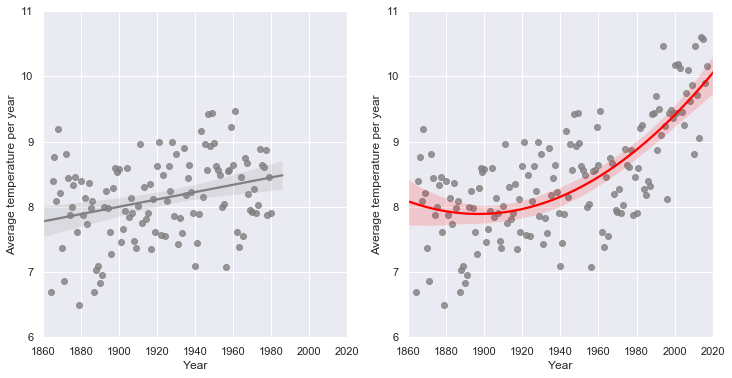

In [105]:
my_scatter = {'color':'grey'}

plt.rcParams['figure.figsize'] = (12, 6)
fig, [ax1, ax2] = plt.subplots(1,2)

sns.regplot(x = 'Year', y = 'Temperature', data = mean_year[mean_year['Year'] <= 1980], 
            fit_reg = True, order = 1, color = 'gray', ax = ax1)

sns.regplot(x = 'Year', y = 'Temperature', data = mean_year, fit_reg = True, order = 2, 
            color = 'red', ax = ax2, scatter_kws = my_scatter)

ax1.set_xlim([1860,2020])    
ax2.set_xlim([1860,2020])    
ax1.set_ylim([6,11])    
ax2.set_ylim([6,11]) 
ax1.set_ylabel('Average temperature per year')
ax2.set_ylabel('Average temperature per year')

None
plt.savefig('/Users/iMotz/Propulsion/PYTHON/Visualization/Weather_temp_regress.png')


### Precipitation

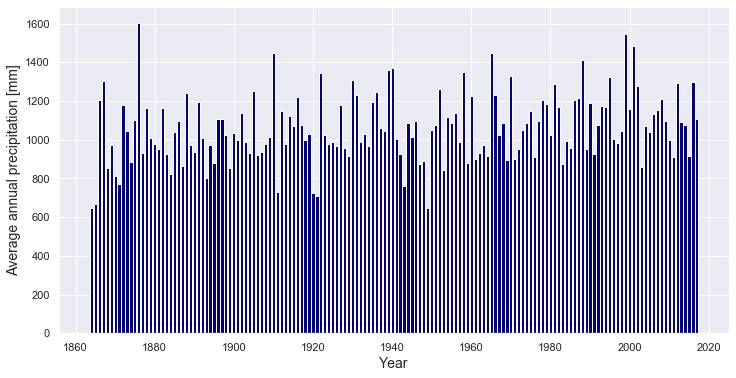

In [50]:
plt.rcParams['figure.figsize'] = (12, 6)

fig, ax = plt.subplots()
ax.bar(x = sum_year['Year'], height = sum_year['Precipitation'], color = 'darkblue')

# ax.plot(min_year['Precipitation'], c = 'blue', lw = 1, label = 'Lowest precipitation')
# ax.plot(max_year['Precipitation'], c = 'darkblue', lw = 1, label = 'Highest precipitation')

# ax.axhspan(min_year['Temperature'], max_year['Temperature'], facecolor='0.5', alpha=0.3)

ax.set_xlabel('Year', size = 14)
ax.set_ylabel('Average annual precipitation [mm]', size = 14)
# ax.legend(loc= 'upper right')
None

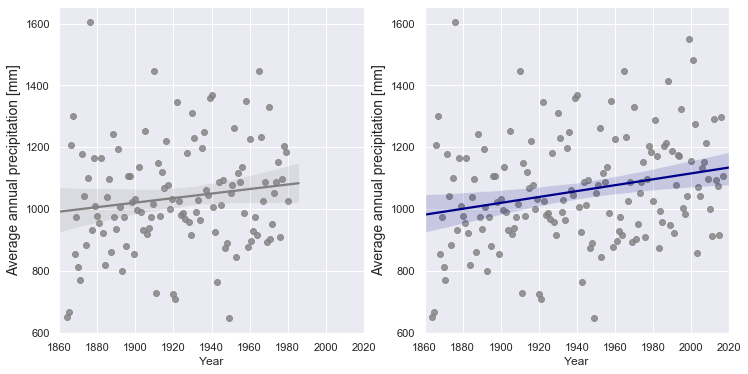

In [106]:
my_scatter = {'color':'grey'}

plt.rcParams['figure.figsize'] = (12, 6)
fig, [ax1, ax2] = plt.subplots(1,2)

sns.regplot(x = 'Year', y = 'Precipitation', data = sum_year[sum_year['Year'] <= 1980], 
            fit_reg = True, order = 1, color = 'gray', ax = ax1)

sns.regplot(x = 'Year', y = 'Precipitation', data = sum_year, fit_reg = True, order = 1, 
            color = 'darkblue', ax = ax2, scatter_kws = my_scatter)

ax1.set_xlim([1860,2020])    
ax2.set_xlim([1860,2020])    
# ax1.set_ylim([6,12])    
# ax2.set_ylim([6,12]) 
ax1.set_ylabel('Average annual precipitation [mm]',size = 14)
ax2.set_ylabel('Average annual precipitation [mm]',size = 14)

plt.savefig('/Users/iMotz/Propulsion/PYTHON/Visualization/Weather_rain_regress.png')

None

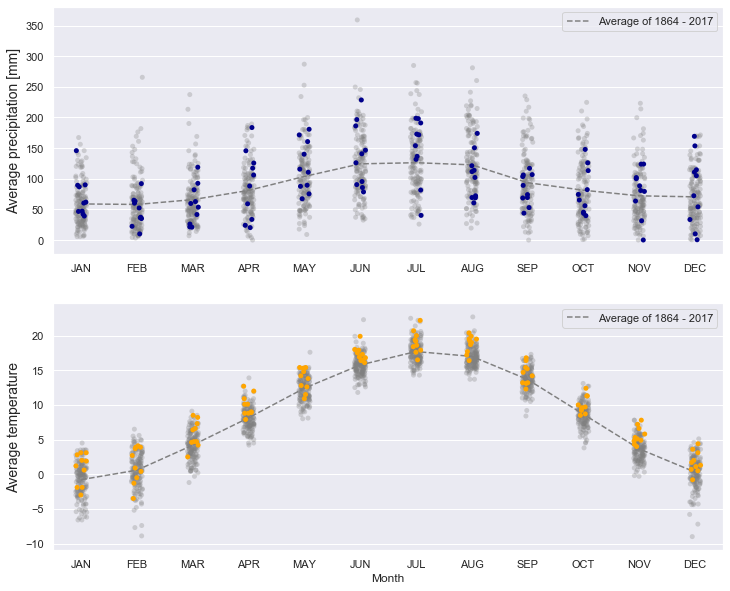

In [111]:
plt.rcParams['figure.figsize'] = (12, 10)
fig, [ax1, ax2] = plt.subplots(2,1)

sns.stripplot(x = 'Month', y = 'Precipitation', data = data, size = 5, alpha = 0.3,
            jitter = True, color = 'grey', edgecolor ='none', ax = ax1)
ax1.plot(mean_month['Month']-1,mean_month['Precipitation'], color = 'grey', ls = '--', label = 'Average of 1864 - 2017')

sns.stripplot(x = 'Month', y = 'Precipitation', data = data[data['Year']>2007], size = 5,
            jitter = True, color = 'darkblue', edgecolor ='none', ax = ax1)
#ax1.plot(mean_month_10['Month']-1,mean_month_10['Precipitation'], color = 'darkblue', ls = '--', label = 'Average of 2008 - 2017')


sns.stripplot(x = 'Month', y = 'Temperature', data = data, size = 5, alpha = 0.3,
            jitter = True, color = 'grey', edgecolor ='none', ax = ax2)
ax2.plot(mean_month['Month']-1,mean_month['Temperature'], color = 'grey', ls = '--', label = 'Average of 1864 - 2017')

sns.stripplot(x = 'Month', y = 'Temperature', data = data[data['Year']>2007], size = 5,
            jitter = True, color = 'orange', edgecolor ='none', ax = ax2)
#ax2.plot(mean_month_10['Month']-1,mean_month_10['Temperature'], color = 'orange', ls = '--', label = 'Average of 2008 - 2017')


ax1.set_ylabel('Average precipitation [mm]',size = 14)
ax2.set_ylabel('Average temperature',size = 14)
ax1.set_xlabel(' ')
ax1.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax2.set_xticklabels(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
ax1.legend()
ax2.legend()

#ax1.tick_params( axis = 'x', labelbottom = False) # remove x tick labels

plt.savefig('/Users/iMotz/Propulsion/PYTHON/Visualization/Weather_month_2.png')

None
